# Importing the required libraries

In [1]:
import numpy as np
from keras_preprocessing import image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing the train and test data set

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        r'D:\05_Py_DW\Deep Learning\CNN - Mask Recognizer (Non Video)\maskData\trainSet',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 3833 images belonging to 2 classes.


In [11]:
print(training_set.class_indices)

{'with_mask': 0, 'without_mask': 1}


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        r'D:\05_Py_DW\Deep Learning\CNN - Mask Recognizer (Non Video)\maskData\testSet',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 276 images belonging to 2 classes.


# Building a CNN deep learning model to classify whether a person wears a mask or not

In [10]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2)) 

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

cnn.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.fit(x= training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
120/120 [==============================] - 36s 298ms/step - loss: 0.3605 - accuracy: 0.8560 - val_loss: 0.2392 - val_accuracy: 0.9457
Epoch 2/25
120/120 [==============================] - 37s 309ms/step - loss: 0.2039 - accuracy: 0.9259 - val_loss: 0.1921 - val_accuracy: 0.9529
Epoch 3/25
120/120 [==============================] - 41s 341ms/step - loss: 0.1869 - accuracy: 0.9322 - val_loss: 0.1599 - val_accuracy: 0.9529
Epoch 4/25
120/120 [==============================] - 40s 333ms/step - loss: 0.1590 - accuracy: 0.9442 - val_loss: 0.4241 - val_accuracy: 0.8370
Epoch 5/25
120/120 [==============================] - 38s 315ms/step - loss: 0.1426 - accuracy: 0.9470 - val_loss: 0.1005 - val_accuracy: 0.9601
Epoch 6/25
120/120 [==============================] - 40s 332ms/step - loss: 0.1235 - accuracy: 0.9525 - val_loss: 0.1010 - val_accuracy: 0.9710
Epoch 7/25
120/120 [==============================] - 42s 349ms/step - loss: 0.1074 - accuracy: 0.9596 - val_loss: 0.0899 - val_ac

# Testing the model on 2 custom images

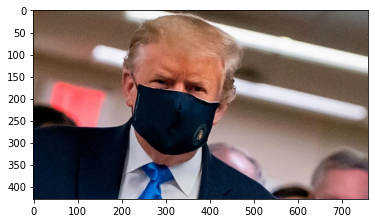

In [18]:
test_image_1 = image.load_img(r"C:\Users\soory\Downloads\test1.jpg"
                           ,target_size= (64,64))
test_image_1 = image.img_to_array(test_image_1)
test_image_1 = np.expand_dims(test_image_1, axis=0)

img_1 = cv2.imread(r"C:\Users\soory\Downloads\test1.jpg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_RGB2BGR)
plt.imshow(img_1)

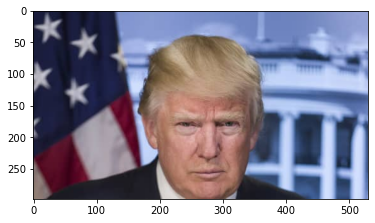

In [32]:
test_image_2 = image.load_img(r"C:\Users\soory\Downloads\test2.jpg"
                           ,target_size= (64,64))
test_image_2 = image.img_to_array(test_image_2)
test_image_2 = np.expand_dims(test_image_2, axis=0)

img_2 = cv2.imread(r"C:\Users\soory\Downloads\test2.jpg")
img_2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2BGR)
plt.imshow(img_2)

In [33]:
result_1 = cnn.predict(test_image_1)
result_2 = cnn.predict(test_image_2)

In [37]:
if result_1[0][0] == 1:
    prediction1 = 'The person does not wears a mask'
else:
    prediction1 = 'The person wears a mask'
    
print(prediction1)

The person wears a mask


In [36]:
if result_2[0][0] == 1:
    prediction2 = 'The person does not wears a mask'
else:
    prediction2 = 'The person wears a mask'
    
print(prediction2)

The person does not wears a mask


# ~THE END